In [5]:
import zipfile 
import pysal as ps
%matplotlib inline
import numpy as np
import ast
import json
import urllib
import urllib2
from cStringIO import StringIO
import pandas as pd
import requests
import os
import geopandas as gpd
import matplotlib.pylab as pl
from fiona.crs import from_epsg
import matplotlib.pylab as pl
from matplotlib import colors
import shapely
import seaborn as sns
import gzip
import mapreduce as mr
import csv
pd.set_option('display.max_columns', None)


In [50]:
sacramentoCB = gpd.GeoDataFrame.from_file('Data/SacramentoCensusBlock.geojson')
sacramentoCB.head()


,ALAND10,AWATER10,BLOCKCE10,COUNTYFP10,FUNCSTAT10,GEOID10,INTPTLAT10,INTPTLON10,LODES,MTFCC10,NAME10,STATEFP10,TRACTCE10,UACE10,UATYP10,UR10,geometry,id
0,122533,0,3016,067,S,060670067023016,+38.6257479,-121.4519923,14,G5040,Block 3016,06,006702,77068,U,U,"POLYGON ((-121.452623 38.625998, -121.452562 3...",0
1,5937,0,2018,067,S,060670066002018,+38.6299084,-121.4466320,5,G5040,Block 2018,06,006600,77068,U,U,"POLYGON ((-121.446116 38.629683, -121.446224 3...",1
2,8070,0,2007,067,S,060670066002007,+38.6326845,-121.4466952,9,G5040,Block 2007,06,006600,77068,U,U,"POLYGON ((-121.446076 38.633048, -121.446076 3...",2
3,28706,0,1021,067,S,060670036001021,+38.5342994,-121.4802584,20,G5040,Block 1021,06,003600,77068,U,U,"POLYGON ((-121.479199 38.533645, -121.481371 3...",3
4,41010,0,1019,067,S,060670037001019,+38.5373652,-121.4743151,2,G5040,Block 1019,06,003700,77068,U,U,"POLYGON ((-121.473216 38.535408, -121.473449 3...",4


In [51]:
sacramentoTrack = gpd.GeoDataFrame.from_file('Data/sacramento_tracks.geojson')
sacramentoTrack .head()


,AFFGEOID,ALAND,AWATER,American Indian and Alaska Native,American Indian and Alaska Native %,American Indian and Alaska Native Voting Population,Asian,Asian %,Asian Voting Population,Black or African American,Black or African American %,Black or African American Voting Population,COUNTYFP,CT_x,CT_y,Car,Car Percent,Carpool,Carpool Percent,Census Tract_x,Census Tract_y,GEOID,LSAD,Median Income,NAME,Native Hawaiian and Other Pacific Islander %,Native Hawaiian and Other Pacific Islander Voting Population,Native Hawaiian and Other Pacific Islander alone,Public Percent,Public Transport,STATEFP,Some other race,Some other race %,Some other race Voting Population,TRACTCE,Total Population,Two or more races,Two or more races %,Two or more races Voting Population,Voting Population,White,White %,White Voting Population,geometry,id
0,1400000US06067002500,984312,0,0,0.000000,0.000000,95,0.057194,71.149910,62,0.037327,46.434678,067,2500,c002500,565,0.93,23,0.04,Census Tract 25,Census Tract 25,06067002500,CT,96023,25,0.000000,0.000000,0,0.03,20,06,16,0.009633,11.983143,002500,1661,91,0.054786,68.154124,1244,1397,0.841060,1046.278146,"POLYGON ((-121.488236 38.55264, -121.487856 38...",0
1,1400000US06067003204,1599411,0,25,0.004450,18.654325,2438,0.433962,1819.169811,429,0.076362,320.108224,067,3204,c003204,1391,0.85,216,0.13,Census Tract 32.04,Census Tract 32.04,06067003204,CT,34231,32.04,0.005518,23.131363,31,0.01,20,06,483,0.085974,360.401566,003204,5618,210,0.037380,156.696333,4192,2002,0.356355,1493.838377,"POLYGON ((-121.427515 38.525077, -121.420091 3...",1
2,1400000US06067004100,2033367,0,70,0.014059,48.475598,1637,0.328781,1133.636473,615,0.123519,425.892750,067,4100,c004100,1063,0.75,282,0.20,Census Tract 41,Census Tract 41,06067004100,CT,27474,41,0.009841,33.932918,49,0.05,73,06,312,0.062663,216.062663,004100,4979,209,0.041976,144.734284,3448,2087,0.419160,1445.265314,"POLYGON ((-121.483144 38.521114, -121.478672 3...",2
3,1400000US06067004402,1240513,0,0,0.000000,0.000000,771,0.164462,503.912969,493,0.105162,322.216724,067,4402,c004402,978,0.83,167,0.14,Census Tract 44.02,Census Tract 44.02,06067004402,CT,24225,44.02,0.000000,0.000000,0,0.03,38,06,1032,0.220137,674.498294,004402,4688,378,0.080631,247.054608,3064,2014,0.429608,1316.317406,"POLYGON ((-121.46476 38.539527, -121.463748 38...",3
4,1400000US06067004802,1423403,0,29,0.006043,20.219629,1479,0.308189,1031.201084,672,0.140029,468.537612,067,4802,c004802,1238,0.76,297,0.18,Census Tract 48.02,Census Tract 48.02,06067004802,CT,34161,48.02,0.007293,24.403001,35,0.06,95,06,617,0.128568,430.190040,004802,4799,311,0.064805,216.838091,3346,1656,0.345072,1154.610544,"POLYGON ((-121.42921 38.501566, -121.428198 38...",4


In [52]:
counts = sacramentoCB.groupby("TRACTCE10").sum()
counts.reset_index(inplace=True)
counts.rename(columns={'TRACTCE10': 'TRACTCE'}, inplace=True)
counts

,TRACTCE,ALAND10,AWATER10,LODES
0,000100,1942577,364850,1692
1,000200,1511258,0,1831
2,000300,1427329,2502,1440
3,000400,975601,0,1863
4,000500,866055,0,1471
5,000600,406307,0,482
6,000700,471399,42394,510
7,000800,523387,51938,667
8,001101,1569667,0,989
9,001200,676073,0,1699


In [53]:
test = sacramentoTrack[['TRACTCE','Voting Population','Total Population']]

In [54]:
test = test.merge(counts, on='TRACTCE')

In [55]:
test['ratiovoting']=0
for i in range(len(test)):
    test.loc[i,'ratiovoting']= float(test.loc[i,'Voting Population'])/float(test.loc[i,'LODES'])
test.head()

,TRACTCE,Voting Population,Total Population,ALAND10,AWATER10,LODES,ratiovoting
0,002500,1244,1661,984311,0,806,1.543424
1,003204,4192,5618,1599411,0,1876,2.234542
2,004100,3448,4979,2033366,0,1781,1.935991
3,004402,3064,4688,1240512,0,1310,2.338931
4,004802,3346,4799,1423392,0,1657,2.019312


In [56]:
test.rename(columns={'TRACTCE':'TRACTCE10'}, inplace=True)
test.drop(['LODES','AWATER10','ALAND10',],axis=1, inplace=True)

In [57]:
sacramentoCB = sacramentoCB.merge(test, on='TRACTCE10')

In [58]:
sacramentoCB.head()

,ALAND10,AWATER10,BLOCKCE10,COUNTYFP10,FUNCSTAT10,GEOID10,INTPTLAT10,INTPTLON10,LODES,MTFCC10,NAME10,STATEFP10,TRACTCE10,UACE10,UATYP10,UR10,geometry,id,Voting Population,Total Population,ratiovoting
0,122533,0,3016,067,S,060670067023016,+38.6257479,-121.4519923,14,G5040,Block 3016,06,006702,77068,U,U,"POLYGON ((-121.452623 38.625998, -121.452562 3...",0,4370,6899,1.812526
1,30200,0,2007,067,S,060670067022007,+38.6391416,-121.4540265,0,G5040,Block 2007,06,006702,77068,U,U,"POLYGON ((-121.454915 38.638608, -121.455471 3...",120,4370,6899,1.812526
2,9339,0,3031,067,S,060670067023031,+38.6272667,-121.4555905,12,G5040,Block 3031,06,006702,77068,U,U,"POLYGON ((-121.456275 38.627621, -121.454908 3...",176,4370,6899,1.812526
3,24385,0,5002,067,S,060670067025002,+38.6256754,-121.4660238,21,G5040,Block 5002,06,006702,77068,U,U,"POLYGON ((-121.464212 38.626003, -121.464223 3...",192,4370,6899,1.812526
4,202388,0,5000,067,S,060670067025000,+38.6234514,-121.4631853,70,G5040,Block 5000,06,006702,77068,U,U,"POLYGON ((-121.458283 38.625943, -121.456942 3...",406,4370,6899,1.812526


In [59]:
sacramentoCB['votingpopulation']=0

In [60]:
for i in range(len(sacramentoCB)):
    sacramentoCB.loc[i,'votingpopulation'] = float(sacramentoCB.loc[i,'LODES'])*sacramentoCB.loc[i,'ratiovoting']

In [61]:
sacramentoCB.head()

,ALAND10,AWATER10,BLOCKCE10,COUNTYFP10,FUNCSTAT10,GEOID10,INTPTLAT10,INTPTLON10,LODES,MTFCC10,NAME10,STATEFP10,TRACTCE10,UACE10,UATYP10,UR10,geometry,id,Voting Population,Total Population,ratiovoting,votingpopulation
0,122533,0,3016,067,S,060670067023016,+38.6257479,-121.4519923,14,G5040,Block 3016,06,006702,77068,U,U,"POLYGON ((-121.452623 38.625998, -121.452562 3...",0,4370,6899,1.812526,25.375363
1,30200,0,2007,067,S,060670067022007,+38.6391416,-121.4540265,0,G5040,Block 2007,06,006702,77068,U,U,"POLYGON ((-121.454915 38.638608, -121.455471 3...",120,4370,6899,1.812526,0.000000
2,9339,0,3031,067,S,060670067023031,+38.6272667,-121.4555905,12,G5040,Block 3031,06,006702,77068,U,U,"POLYGON ((-121.456275 38.627621, -121.454908 3...",176,4370,6899,1.812526,21.750311
3,24385,0,5002,067,S,060670067025002,+38.6256754,-121.4660238,21,G5040,Block 5002,06,006702,77068,U,U,"POLYGON ((-121.464212 38.626003, -121.464223 3...",192,4370,6899,1.812526,38.063044
4,202388,0,5000,067,S,060670067025000,+38.6234514,-121.4631853,70,G5040,Block 5000,06,006702,77068,U,U,"POLYGON ((-121.458283 38.625943, -121.456942 3...",406,4370,6899,1.812526,126.876815


In [63]:
sacramentoCB.groupby("TRACTCE10").sum()

,ALAND10,AWATER10,LODES,Voting Population,Total Population,ratiovoting,votingpopulation
TRACTCE10,,,,,,,
001101,1569667,0,989,298220,322196,301.536906,2015.0
001200,676073,0,1699,232956,241785,137.113596,2876.0
001300,792610,0,1651,278784,295296,168.857662,2904.0
001400,794017,0,1211,225040,234643,185.829893,2320.0
001500,1746201,0,2146,393900,480200,183.550792,3939.0
001600,3048885,0,2389,600362,733952,251.302637,4921.0
001700,3525650,0,2052,664815,773385,323.983918,4715.0
001800,1717606,0,2015,510174,585018,253.188089,4049.0
001900,1105357,0,1478,399185,446745,270.084574,2753.0


In [64]:

VotingPopulation = sacramentoTrack[sacramentoTrack['Voting Population']>0]['Voting Population']
VotingPopulation = ps.Quantiles(VotingPopulation, k=6)
VotingPopulation

                 Quantiles                  
 
 Lower              Upper              Count
           x[i] <= 2273.667               52
2273.667 < x[i] <= 2863.667               51
2863.667 < x[i] <= 3433.000               51
3433.000 < x[i] <= 3930.000               51
3930.000 < x[i] <= 4664.167               51
4664.167 < x[i] <= 9452.000               52

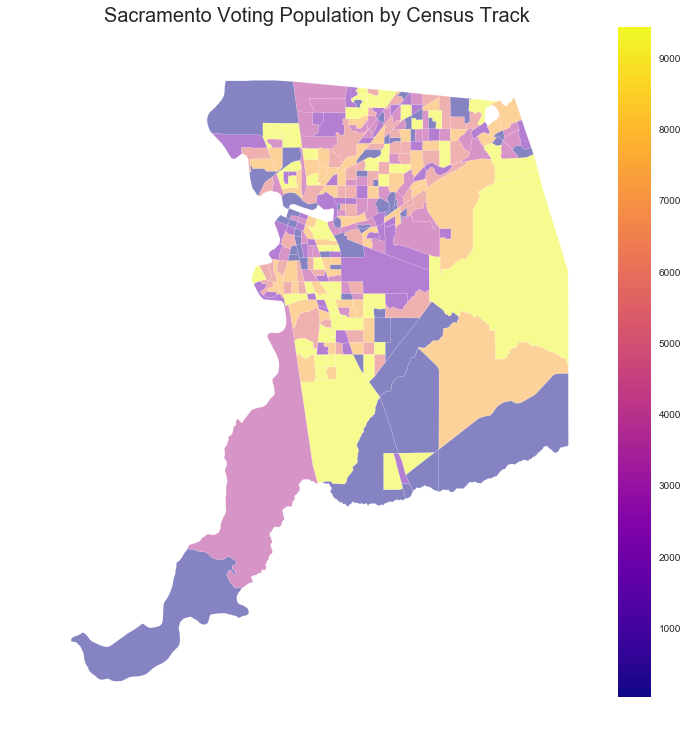

In [73]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm
f, ax = pl.subplots(figsize=(12,12))
pl.xlabel('longitude')
pl.ylabel('latitude')


sacramentoTrack[sacramentoTrack['Voting Population']==0].plot(c = 'k', linewidth = .5, ax = ax)
sacramentoTrack[sacramentoTrack['Voting Population']>0].assign(cl = VotingPopulation.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=False)

pl.axis('off')
pl.title("Sacramento Voting Population by Census Track", size=20)


normalize = mcolors.Normalize(vmin=52,vmax=9452)
colormap = cm.plasma
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(sacramentoTrack[sacramentoTrack['Voting Population']>0].assign(cl = VotingPopulation.yb))
pl.colorbar(scalarmappaple, ax=ax)
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [72]:
LODES = sacramentoCB[sacramentoCB['LODES']>0]['LODES']
LODES = ps.Quantiles(LODES, k=6)
LODES

                 Quantiles                  
 
 Lower            Upper                Count
          x[i] <=   7.000               2504
  7.000 < x[i] <=  13.000               2555
 13.000 < x[i] <=  20.000               2530
 20.000 < x[i] <=  30.000               2381
 30.000 < x[i] <=  55.000               2411
 55.000 < x[i] <= 896.000               2436

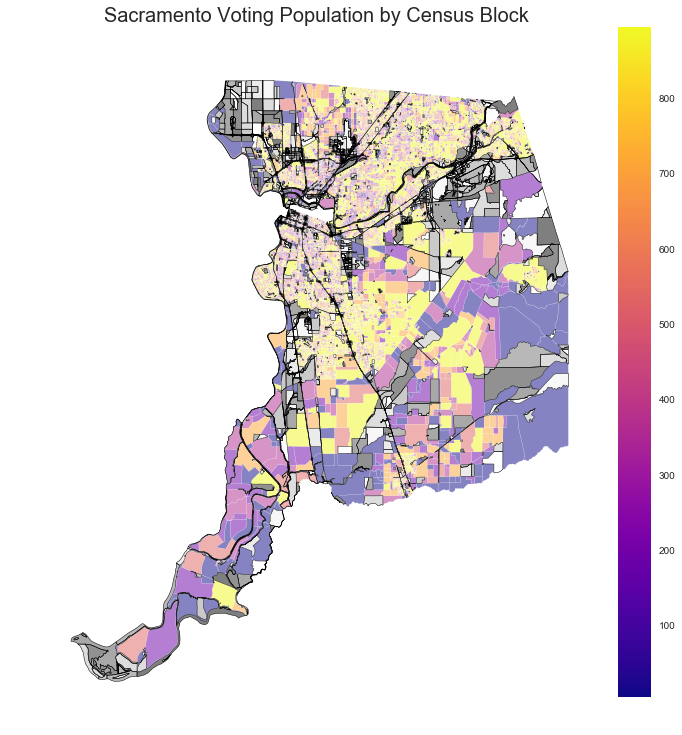

In [74]:
f, ax = pl.subplots(figsize=(12,12))
pl.xlabel('longitude')
pl.ylabel('latitude')


sacramentoCB[sacramentoCB['LODES']==0].plot(c = 'k', linewidth = .5, ax = ax)
sacramentoCB[sacramentoCB['LODES']>0].assign(cl = LODES.yb).plot(column = 'cl', categorical = True, k = 10, linewidth = .1,
                                          ax=ax, cmap='plasma', edgecolor='white', legend=False)

pl.axis('off')
pl.title("Sacramento Voting Population by Census Block", size=20)


normalize = mcolors.Normalize(vmin=7,vmax=896)
colormap = cm.plasma
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(sacramentoCB[sacramentoCB['LODES']>0].assign(cl = LODES.yb))
pl.colorbar(scalarmappaple, ax=ax)
#ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [80]:

forcluster = sacramentoCB[['geometry','LODES','GEOID10']]

In [81]:
forcluster['x']=0
forcluster['y']=0

def getX(pt):
    return pt.x
def getY(pt):
    return pt.y

C:\Users\ferna\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\ferna\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [83]:
for i in range(len(forcluster)):
    forcluster.loc[i,'x']= getX(sacramentoCB.loc[i,'geometry'].centroid)
    forcluster.loc[i,'y']= getY(sacramentoCB.loc[i,'geometry'].centroid)

KeyboardInterrupt: 

In [ ]:
forcluster.head()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
n=22 # number of clusters
#dd=dfclusters #data

km=KMeans(random_state=324,n_clusters=n)
clustKM=km.fit(forcluster)
#result.
print(clustKM.labels_)
# print res.predict(dd)

#gm=GaussianMixture(n_components=n,random_state=324)
#clustGM=gm.fit(dfclusters)

In [ ]:
f, ax = pl.subplots(figsize=(15,15))
calif[calif.COUNTYFP=='067'].plot(c = 'green', linewidth = .5, ax = ax,  cmap = 'Greens', label = 'parks')
#CensusBlocks[CensusBlocks["Within30min"] == True].plot(c = 'blue', linewidth = .5, ax = ax,  cmap = 'Blues', label = 'parks')
pl.axis('off')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("Census Blocks Groups", size = 20)